Construindo um grafo automaticamente
====================================



## Introdução



Neste notebook nós vamos dar o primeiro passo para construir nossa rede neural artificial. Neste primeiro passo, nós vamos criar uma classe que gera automaticamente o nosso `grafo computacional`. O grafo computacional é o grafo que representa todas as operações matemáticas que ocorreram ao se computar um certo valor $y$. O grafo computacional é um passo necessário pois será baseado nele que iremos computar os gradientes locais necessários para realizar o `backpropagation`.



## Importações



In [1]:
from funcoes import plota_grafo

## Código e discussão



### Primeiros passos



A base de tudo será uma classe chamada `Valor`. Vamos começar pelo básico!



In [2]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

Vamos testar nossa classe!



In [3]:
x1 = Valor(10)
print(x1)
print(x1.data)

Valor(data=10)
10


### Os dunders `__add__` e `__mul__`



Observe que não conseguimos adicionar nem multiplicar objetos criados com a classe `Valor`.



In [4]:
a = Valor(10)
b = Valor(5)

In [5]:
print(a + b)

TypeError: unsupported operand type(s) for +: 'Valor' and 'Valor'

In [6]:
print(a * b)

TypeError: unsupported operand type(s) for *: 'Valor' and 'Valor'

Ué&#x2026; porque não conseguimos? Não conseguimos pois o Python (ainda) não é vidente. Ele lá vai saber como adicionar ou multiplicar algo que você criou? Pra você parece óbvio que valores podem ser adicionados ou multiplicados, mas para o Python ele nem sabe o que significa a palavra `Valor`&#x2026;

Como sempre, temos que contar para o programa o que queremos que aconteça quando usarmos os operadores `+` e `*`. Quem faz isso são os dunders `__add__` e `__mul__`.



In [7]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        saida = Valor(self.data + outro_valor.data)
        return saida

    def __mul__(self, outro_valor):
        saida = Valor(self.data * outro_valor.data)
        return saida

Vamos testar!



In [8]:
a = Valor(10)
b = Valor(5)

print(a + b)
print(a * b)

Valor(data=15)
Valor(data=50)


### Registrando os progenitores



Nosso objetivo é construir um grafo computacional. Em um grafo computacional, um certo vértice pode ter um ou mais vértices progenitores (são seus pais/mães). Nós não podemos perder essa informação quando formos construir um grafo, então precisamos incluir essa informação na nossa classe.



In [9]:
class Valor:
    def __init__(self, data, progenitor=()):
        self.data = data
        self.progenitor = progenitor

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

Vamos testar!



In [10]:
a = Valor(10)
b = Valor(5)

print(a.data)
print(a.progenitor)

c = a + b

print(c.progenitor)

d = c * a

print(d.progenitor)

10
()
(Valor(data=10), Valor(data=5))
(Valor(data=15), Valor(data=10))


### Registrando o operador mãe



Em um grafo computacional, um vértice pode ter um operador mãe. O operador mãe é o operador que foi usado para gerar o vértice.



In [11]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [12]:
a = Valor(10)
b = Valor(5)

c = a + b
d = c * a

print(c)
print(c.progenitor)
print(c.operador_mae)

Valor(data=15)
(Valor(data=10), Valor(data=5))
+


### Plotando o primeiro grafo



Vamos plotar nosso primeiro grafo!



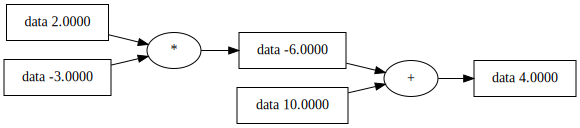

In [13]:
a = Valor(2)
b = Valor(-3)
c = Valor(10)

d = a * b
e = d + c

plota_grafo(e)

### Registrando o rótulo



Nosso grafo seria mais legível se tivéssemos rótulos indicando o que é cada vértice. Vamos incluir essa informação na nossa classe.



In [14]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



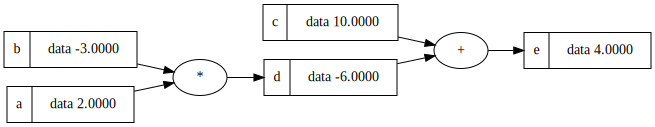

In [15]:
a = Valor(2, rotulo="a")
b = Valor(-3, rotulo="b")
c = Valor(10, rotulo="c")

d = a * b
e = d + c

d.rotulo = "d"
e.rotulo = "e"

plota_grafo(e)

### Refazendo o grafo que fizemos na aula anterior



Na aula anterior nós fizemos um grafo computacional para aprender como funciona o backpropagation. Vamos refazer ele aqui!



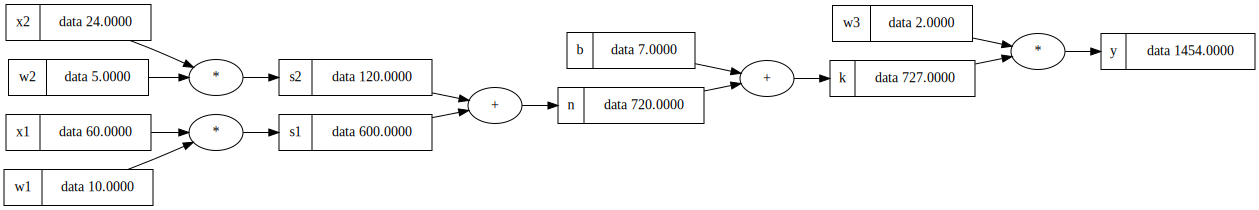

In [16]:
x1 = Valor(60, rotulo='x1')
x2 = Valor(24, rotulo='x2')

w1 = Valor(10, rotulo='w1')
w2 = Valor(5, rotulo='w2')
w3 = Valor(2, rotulo='w3')

b = Valor(7, rotulo='b')

s1 = x1*w1
s1.rotulo = 's1'

s2 = x2*w2
s2.rotulo = 's2'

n = s1+s2
n.rotulo = 'n'

k = n + b
k.rotulo = 'k'

y = k*w3
y.rotulo = 'y'

plota_grafo(y)

## Conclusão

Neste experimento, estudamos a representação de grafos assim como aqueles vistos na primeira aula de Redes Neurais, representando as operações e o sentido que deve ser seguido. Por meio da utilização de classes, pudemos criar um objeto que contenha as características necessárias, criando inclusive uma relação de parentesco. Isto é, para representar todo o caminho, o código utiliza a ideia de progenitor, que é uma tupla, e o operador mãe, que é uma string.

Para realizar operações com os valores definidos nas classes, foi ainda necessário definir as operações internamente por meio dos dunders, métodos delimitados por meio de um duplo sublinhado `__`, como em `__add__`. Nota-se a importância de realizar tal construção já que necessitaremos calcular o backpropagation do código.

Utilizamos ainda a função de Andrej Karpathy para plotar o grafo utilizando o módulo de Python Graphviz e representamos o grafo da aula 1 de Redes Neurais, com exceção da representação do gradiente.

## Playground

